In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data
y = data.target

In [4]:
X.shape

(569, 30)

In [7]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [8]:
lrl1 = lrl1.fit(X,y)

In [9]:
# 重要属性coef_，查看每个特征对应的参数
lrl1.coef_

array([[ 4.02239906,  0.03221963, -0.14028821, -0.01622923,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50503524,  0.        , -0.07125207,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24619104, -0.1287801 , -0.0144012 ,  0.        ,
         0.        , -2.0186616 ,  0.        ,  0.        ,  0.        ]])

In [10]:
# 参数中不为零的个数
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [11]:
lrl2 = lrl2.fit(X,y)

In [12]:
lrl2.coef_

array([[ 1.61454497e+00,  1.02316739e-01,  4.97886800e-02,
        -4.59398990e-03, -9.52062394e-02, -3.01447712e-01,
        -4.57306387e-01, -2.23853899e-01, -1.37196445e-01,
        -1.94113783e-02,  1.43732594e-02,  8.87475122e-01,
         1.12849503e-01, -9.42179529e-02, -9.94813740e-03,
        -2.24634749e-02, -5.61753487e-02, -2.71569209e-02,
        -2.79469307e-02,  4.07968420e-04,  1.24824152e+00,
        -3.01727480e-01, -1.71876411e-01, -2.20696658e-02,
        -1.75242992e-01, -8.78026780e-01, -1.16439070e+00,
        -4.30641527e-01, -4.25341495e-01, -8.69475812e-02]])

In [15]:
l1 = []
l2 = []
l1_test = []
l2_test = []

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=520)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1_test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2_test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

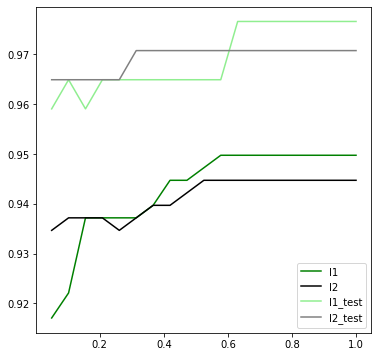

In [27]:
# import matplotlib.pytlot as plt
import matplotlib.pyplot as plt
graph = [l1,l2,l1_test,l2_test]
color = ["green","black","lightgreen","gray"]
label = ["l1","l2","l1_test","l2_test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.savefig("C_values",dpi=300)
plt.show()

### 特征工程

In [30]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [29]:
data = load_breast_cancer()

In [31]:
LR_ = LR(solver="liblinear",C=0.9,random_state=520)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [32]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)

In [33]:
X_embedded.shape

(569, 9)

In [35]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.0, 17)
(0.0, 12)
(0.0, 11)
(0.0, 8)
(0.0, 8)
(0.0, 6)
(0.0, 5)
(0.0, 5)
(0.0, 5)
(0.0, 5)
(0.0, 4)
(0.0, 2)
(0.0, 2)
(0.0, 2)
(0.0, 1)
(0.0, 1)
(0.0, 1)
(0.0, 1)
(0.0, 1)


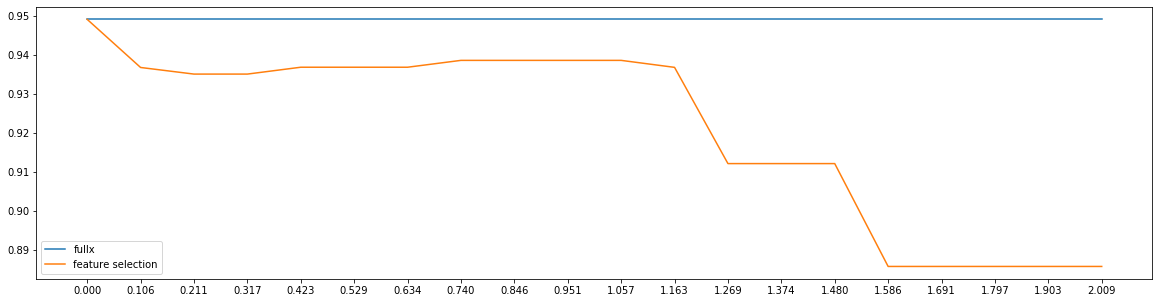

In [36]:
fullx = []
fsx = []

threshold = np.linspace(0,(abs(LR_.fit(data.data,data.target).coef_)).max(),20)

k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    print((threshold[k],X_embedded.shape[1]))

plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="fullx")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.savefig("fsx",dpi=300)
plt.show()

0.9561090225563911 7.51


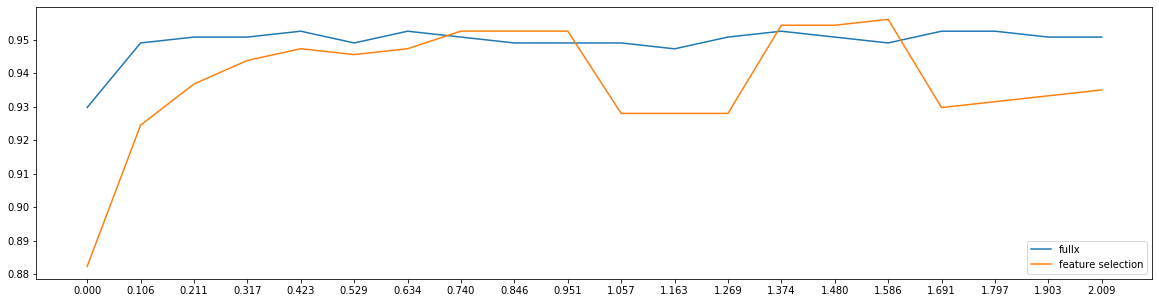

In [41]:
fullx = []
fsx = []

C = np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=520)
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="fullx")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.savefig("fsx_C",dpi=300)
plt.show()

0.9561090225563911 6.704999999999996


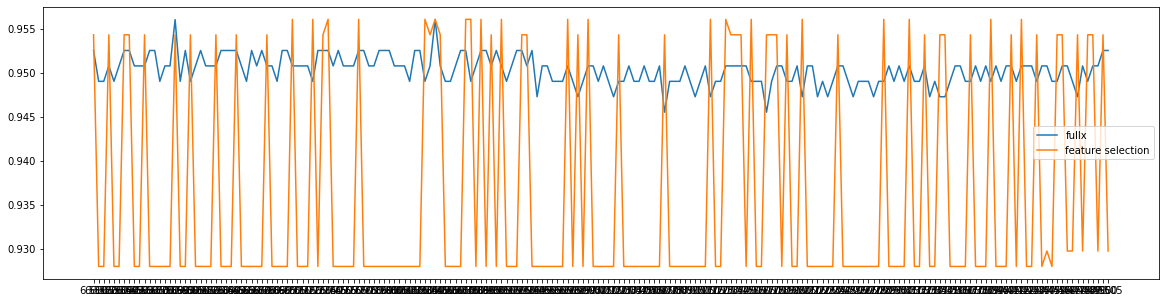

In [42]:
fullx = []
fsx = []

C = np.arange(6.51,7.51,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=520)
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="fullx")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.savefig("fsx_C2",dpi=300)
plt.show()

In [47]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.704999999999996,random_state=520) 
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508145363408522

In [48]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.704999999999996,random_state=520) 
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target) 
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [49]:
X_embedded.shape

(569, 9)

### max_iter学习曲线

/home/shban/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shban/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


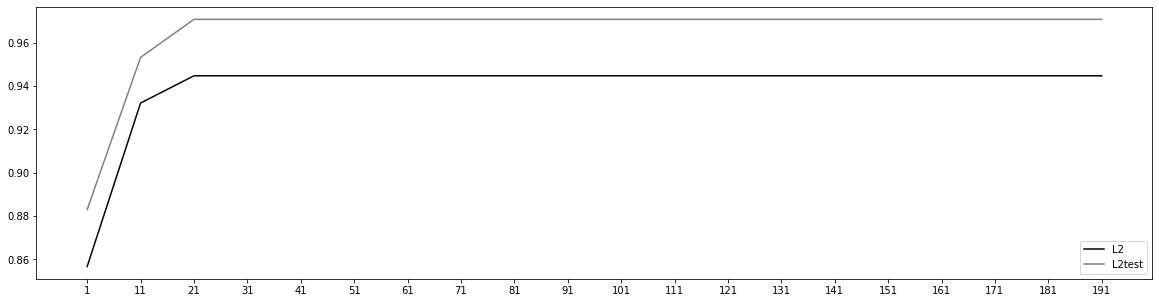

In [4]:
l2 = []
l2_test = []

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=520)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2_test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2_test]
color = ["black", "gray"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])

plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.savefig("max_iter",dpi=300)
plt.show()

In [5]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([19], dtype=int32)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

for multi_class in ("multinomial","ovr"):
    clf = LR(solver='sag',max_iter=100,random_state=42,
             multi_class=multi_class).fit(iris.data,iris.target)

    #打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。 #字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target),multi_class))

training score : 0.960 (ovr)


/home/shban/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shban/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shban/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shban/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 评分卡案例

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv('rankingcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.shape

(150000, 12)

In [6]:
# 去除重复值
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
# 删除之后千万不要忘记，恢复索引
data.index =range(data.shape[0])
# 或者直接删除并恢复索引
# data.reset_index(drop=True,inplace=True)

In [8]:
data.head(30)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [9]:
data.isnull().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [10]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

In [11]:
data.isnull().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [15]:
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签 to_fill：字符串，要填补的那一列的名称
    """
    # 构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    
    # 用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [16]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
X.shape

(150000, 11)

In [17]:
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

In [18]:
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [20]:
# 描述性统计
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,1500.99,15000.900000,37500.750000,75000.500000,112500.250000,135000.100000,148500.010000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.00,0.002969,0.029867,0.154181,0.559046,0.981278,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,24.00,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.00,0.030874,0.175074,0.366508,0.868254,1267.000000,4979.040000,329664.0
MonthlyIncome,150000.0,5419.811343,13244.884063,0.0,0.00,0.180000,1800.000000,4404.000000,7400.000000,10773.100000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,0.00,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.00,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0


In [21]:
# 异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [22]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [23]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse" 
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"

这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？

我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""
data[data.loc[:,"NumberOfTimes90DaysLate"]>90].count()

Unnamed: 0                              269
SeriousDlqin2yrs                        269
RevolvingUtilizationOfUnsecuredLines    269
age                                     269
NumberOfTime30-59DaysPastDueNotWorse    269
DebtRatio                               269
MonthlyIncome                           269
NumberOfOpenCreditLinesAndLoans         269
NumberOfTimes90DaysLate                 269
NumberRealEstateLoansOrLines            269
NumberOfTime60-89DaysPastDueNotWorse    269
NumberOfDependents                      269
dtype: int64

In [24]:
#有269个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基本可以判断，这些样本是某种异常，应该把它们删除。
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]

In [25]:
#恢复索引
data.index = range(data.shape[0]) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149730 entries, 0 to 149729
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149730 non-null  int64  
 1   SeriousDlqin2yrs                      149730 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149730 non-null  float64
 3   age                                   149730 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149730 non-null  int64  
 5   DebtRatio                             149730 non-null  float64
 6   MonthlyIncome                         149730 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149730 non-null  int64  
 8   NumberOfTimes90DaysLate               149730 non-null  int64  
 9   NumberRealEstateLoansOrLines          149730 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149730 non-null  int64  
 11  

### 样本不均衡问题

In [32]:
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149725,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149726,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149727,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149728,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [33]:
# 探索标签的分布
X = data.iloc[:,2:]
y = data.iloc[:,1]

y.value_counts()

0    139851
1      9879
Name: SeriousDlqin2yrs, dtype: int64

In [34]:
y

0         1
1         0
2         0
3         0
4         0
         ..
149725    0
149726    0
149727    0
149728    0
149729    0
Name: SeriousDlqin2yrs, Length: 149730, dtype: int64

In [35]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print('样本个数：{};1占{:.2%};0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149730;1占6.60%;0占93.40%


In [37]:
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多 
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
import imblearn

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=17)
X,y = sm.fit_sample(X,y)

n_sample_ = X.shape[0]
n_1_sample_ = y.value_counts()[1]
n_0_sample_ = y.value_counts()[0]

print('样本个数：{};1占{:.2%};0占{:.2%}'.format(n_sample_,n_1_sample_/n_sample_,n_0_sample_/n_sample_))

样本个数：279702;1占50.00%;0占50.00%


In [42]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size=0.3,random_state=0)
model_data = pd.concat([Y_train,X_train],axis=1)
model_data.index = range(model_data.shape[0])
model_data.cloumns = data.columns

vali_data = pd.concat([Y_vali,X_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns[1:]

model_data.to_csv("model_data.csv")
vali_data.to_csv("vali_data.csv")

/home/shban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


### 等频分箱

In [47]:
# 按照等频对需要分箱的列进行分箱
model_data['qcut'],updown = pd.qcut(model_data["age"],retbins=True,q=20)
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化 
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数 
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series 
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
# 在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data["qcut"]

0          (28.0, 31.0]
1          (41.0, 43.0]
2          (68.0, 74.0]
3          (58.0, 61.0]
4          (50.0, 52.0]
              ...      
195786     (36.0, 39.0]
195787     (28.0, 31.0]
195788     (64.0, 68.0]
195789     (39.0, 41.0]
195790    (74.0, 107.0]
Name: qcut, Length: 195791, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [48]:
# 所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [52]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [73]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]

In [54]:
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4309, 7409),
 (28.0, 31.0, 3551, 6079),
 (31.0, 34.0, 3984, 6665),
 (34.0, 36.0, 2885, 4670),
 (36.0, 39.0, 5246, 7513),
 (39.0, 41.0, 4001, 6015),
 (41.0, 43.0, 4029, 5750),
 (43.0, 45.0, 4423, 5807),
 (45.0, 47.0, 4704, 6565),
 (47.0, 48.0, 2503, 3134),
 (48.0, 50.0, 4920, 6198),
 (50.0, 52.0, 4675, 5702),
 (52.0, 54.0, 4673, 4862),
 (54.0, 56.0, 4551, 4119),
 (56.0, 58.0, 4538, 3597),
 (58.0, 61.0, 6695, 4916),
 (61.0, 64.0, 6884, 3291),
 (64.0, 68.0, 6601, 2345),
 (68.0, 74.0, 6894, 1913),
 (74.0, 107.0, 7811, 1364)]

In [56]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西 
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例

def get_woe(num_bins):
    # 通过num_bins数据计算woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0 / df.count_0.sum()
    df["bad%"] = df.count_1 / df.count_1.sum()
    df["woe"] = np.log(df["good%"]/df["bad%"])
    
    return df

In [57]:
# 计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

### 3.3.4 卡方检验，合并箱体，画出IV曲线

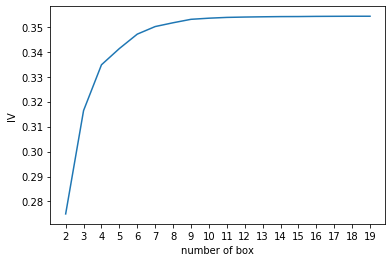

In [60]:
num_bins_ = num_bins.copy()

import matplotlib.pyplot as plt
import scipy

IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    # 获取num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        
        # 0 返回chi2值，1返回p值
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
#         chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
    
    # 通过p值进行处理。合并p值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][0],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3]
    )]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))

plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

从上图中看，箱子个数在从19减少到6的过程中，信息量的下降并不明显，从6往下减少时，信息量的下降突然加快，所以说6是个重要的拐点，我们可以选6作为箱子的个数

In [61]:
num_bins_

[(21.0, 52.0, 69687, 89001), (61.0, 74.0, 28190, 8913)]

### 3.3.5 用最佳分箱个数分箱，并验证分箱结果

In [70]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        # 获取num_bins_两两之间的卡方检验的置信度（或卡方值）
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]

            # 0 返回chi2值，1返回p值
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        # 通过p值进行处理。合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][0],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3]
        )]
    
    return num_bins_

In [74]:
num_bins = num_bins.copy()

In [75]:
num_bins

[(21.0, 28.0, 4309, 7409),
 (28.0, 31.0, 3551, 6079),
 (31.0, 34.0, 3984, 6665),
 (34.0, 36.0, 2885, 4670),
 (36.0, 39.0, 5246, 7513),
 (39.0, 41.0, 4001, 6015),
 (41.0, 43.0, 4029, 5750),
 (43.0, 45.0, 4423, 5807),
 (45.0, 47.0, 4704, 6565),
 (47.0, 48.0, 2503, 3134),
 (48.0, 50.0, 4920, 6198),
 (50.0, 52.0, 4675, 5702),
 (52.0, 54.0, 4673, 4862),
 (54.0, 56.0, 4551, 4119),
 (56.0, 58.0, 4538, 3597),
 (58.0, 61.0, 6695, 4916),
 (61.0, 64.0, 6884, 3291),
 (64.0, 68.0, 6601, 2345),
 (68.0, 74.0, 6894, 1913),
 (74.0, 107.0, 7811, 1364)]

In [76]:
afterbins = get_bin(num_bins,4)

In [77]:
afterbins

[(21.0, 36.0, 49230, 71507),
 (52.0, 56.0, 20457, 17494),
 (61.0, 64.0, 20379, 7549),
 (74.0, 107.0, 7811, 1364)]

### 3.3.6 将选取最佳分箱个数的过程包装为函数